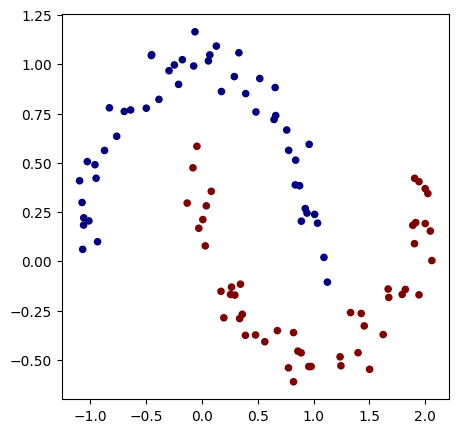

In [1]:
from engine import Tensor
import numpy as np
import matplotlib.pyplot as plt

# point classification
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [2]:
# initialize the weights and biases
# 2 -> 16 -> 16 -> 1
input_size = 2
hidden_layers_size = 16
output_size = 1

w1 = Tensor.rand((input_size, hidden_layers_size))
b1 = Tensor.rand(hidden_layers_size)

w2 = Tensor.rand((hidden_layers_size, hidden_layers_size))
b2 = Tensor.rand(hidden_layers_size)

w3 = Tensor.rand((hidden_layers_size, output_size))
b3 = Tensor.rand(output_size)

parameters = [w1, b1, w2, b2, w3, b3]

print(sum(p.nelement() for p in parameters))

for p in parameters:
    p.zero_grad()

337


In [3]:
ri = np.random.permutation(X.shape[0])[:12]
Xb, yb = X[ri], y[ri]

In [4]:
step_size = 0.1
batch_size = None

for i in range(100):
    # batch creation
    if(batch_size is None):
        Xb, yb = Tensor(X), Tensor(y)
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = Tensor(X[ri]), Tensor(y[ri])

    # forward pass
    h1preact = Xb @ w1 + b1
    h1 = h1preact.relu()

    h2preact = h1 @ w2 + b2
    h2 = h2preact.relu()

    scores = h2 @ w3 + b3

    # svm "max-margin" loss
    losses = [(1.0 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))

    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum(((p**2).sum() for p in parameters))
    total_loss = data_loss + reg_loss

    # accuracyg
    accuracy = [(yi.data > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    ac = sum(accuracy) / len(accuracy)

    # backward pass
    for p in parameters:
        p.zero_grad()

    total_loss.backward()

    # update
    for p in parameters:
        p.data += -step_size * p.grad

    if i % 1 == 0:
        print(f"step {i} loss {total_loss.data}, accuracy {ac*100}%")


step 0 loss [1.40511253], accuracy [50.]%
step 1 loss [1.2395704], accuracy [50.]%
step 2 loss [1.08822913], accuracy [50.]%
step 3 loss [0.96512285], accuracy [50.]%
step 4 loss [0.87692806], accuracy [50.]%
step 5 loss [0.79171105], accuracy [57.]%
step 6 loss [0.71069937], accuracy [68.]%
step 7 loss [0.62797601], accuracy [75.]%
step 8 loss [0.53710125], accuracy [80.]%
step 9 loss [0.45649408], accuracy [81.]%
step 10 loss [0.41626589], accuracy [80.]%
step 11 loss [0.39293133], accuracy [82.]%
step 12 loss [0.37511693], accuracy [82.]%
step 13 loss [0.36060604], accuracy [84.]%
step 14 loss [0.3476305], accuracy [85.]%
step 15 loss [0.33526684], accuracy [85.]%
step 16 loss [0.32272267], accuracy [86.]%
step 17 loss [0.30946257], accuracy [86.]%
step 18 loss [0.29659002], accuracy [88.]%
step 19 loss [0.28368609], accuracy [89.]%
step 20 loss [0.27164432], accuracy [89.]%
step 21 loss [0.26021012], accuracy [89.]%
step 22 loss [0.24778566], accuracy [91.]%
step 23 loss [0.2354849

(-1.6107261012818685, 2.1392738987181312)

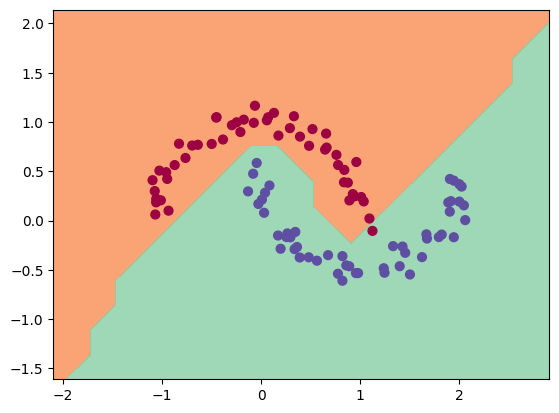

In [5]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = Tensor(np.c_[xx.ravel(), yy.ravel()])

# forward through model
h1preact = Xmesh @ w1 + b1
h1 = h1preact.relu()

h2preact = h1 @ w2 + b2
h2 = h2preact.relu()

scores = h2 @ w3 + b3

Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())